In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score


plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

Activation neuronnes : 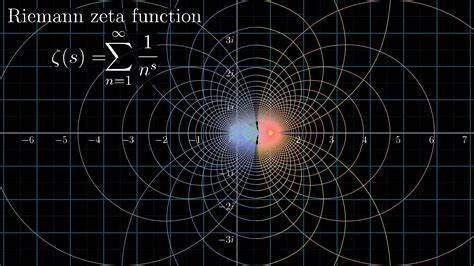

IMPORT (pour les maths t'en fais pas c'est Mistral, Yvan Monka et des docs copy paste 🤐)

J'ai pas trp compris pour : α() Σ(somme) ∏(produit)

🤓🤓🤓🤓🤓🤓🤓🤓🤓🤓🤓🤓🤓🤓🤓# INFO : 🤓🤓🤓🤓🤓🤓🤓🤓
Bien sûr ! Voici un rappel clair des **trois symboles mathématiques** que tu as mentionnés, avec leur signification :

---

### 1. **α (alpha)**

* 🔤 **Lettre grecque "alpha"**
* 🔧 Utilisée comme **variable ou paramètre**, souvent pour :

  * un **angle** (en trigonométrie),
  * un **taux**, une **constante**, ou un **coefficient** (en stats, deep learning, etc.),
  * une **valeur de régularisation** ou un **facteur d’équilibre** dans une formule.

---

### 2. **Σ (sigma majuscule)**

* ➕ **Symbole de somme**
* 📐 Utilisé pour **additionner** une série de termes :

  $$
  \sum_{i=1}^{n} a_i = a_1 + a_2 + \dots + a_n
  $$
* Très courant en statistiques, algèbre, deep learning (ex. moyenne, cross-entropy, etc.)

---

### 3. **∏ (pi majuscule)**

* ✖️ **Symbole de produit**
* 📦 Utilisé pour **multiplier** une suite de termes :

  $$
  \prod_{i=1}^{n} a_i = a_1 \cdot a_2 \cdot \dots \cdot a_n
  $$
* Moins fréquent que Σ, mais utile dans les probas (ex : vraisemblance de lois indépendantes).

---

### En résumé

| Symbole | Nom                    | Usage principal      |
| ------- | ---------------------- | -------------------- |
| **α**   | Alpha (lettre grecque) | Variable / paramètre |
| **Σ**   | Sigma majuscule        | Somme d’une suite    |
| **∏**   | Pi majuscule           | Produit d’une suite  |

Si tu veux un exemple concret avec ces trois symboles combinés, je peux t’en créer un aussi.
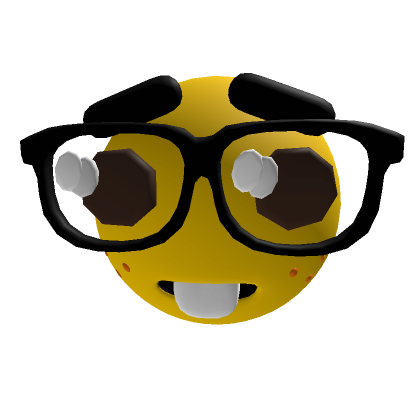

# 1. Functions


In [2]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [3]:
def model(X, W, b):
    Z = X.dot(W) + b
    # print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [4]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [5]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [6]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [7]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [8]:
from tqdm import tqdm

In [9]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

# El famoso Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


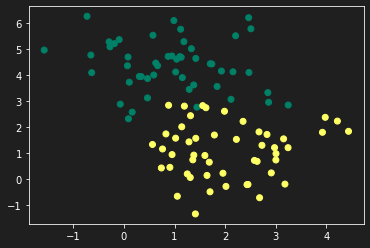

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

Bug !! à correct 


In [ ]:
W, b = artificial_neuron(X, y)

TypeError: artificial_neuron() missing 2 required positional arguments: 'X_test' and 'y_test'

# CHien / Chat

In [3]:
# !pip install h5py
from utilities import *

In [4]:
X_train, y_train, X_test, y_test = load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [6]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


Guillaume ? Enfin le nom d'un daron (Lui aussi il est dataAnalyst comme toi je crois nan ?) à un pote et il est sous dossier :)

C:\Users\Guillaume\Anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


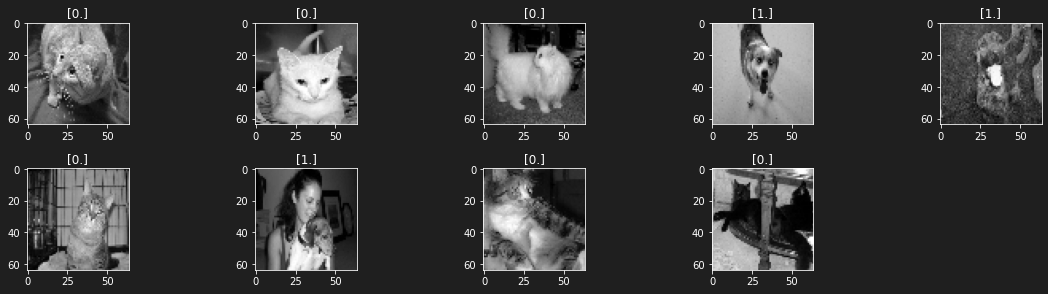

In [7]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

# Entrainement du Modele

In [17]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [18]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

100%|██████████| 10000/10000 [00:30<00:00, 327.51it/s]


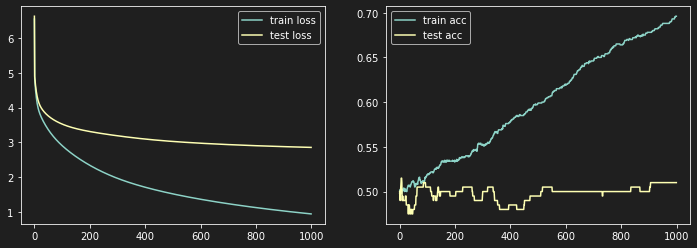

In [46]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iter=10000)

# Experience Normalisation

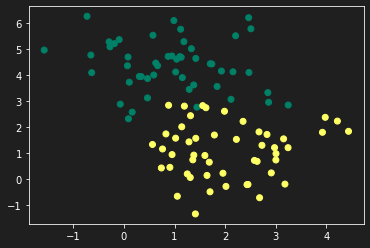

In [345]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:, 1] = X[:, 1] * 1

y = y.reshape(y.shape[0], 1)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [346]:
def artificial_neuron_2(X, y, learning_rate=0.1, n_iter=1000):

  W, b = initialisation(X)
  W[0], W[1] = -7.5, 7.5

  nb = 1
  j=0
  history = np.zeros((n_iter // nb, 5))

  A = model(X, W, b)
  Loss = []
  

  Params1 = [W[0]]
  Params2 = [W[1]]
  Loss.append(log_loss(y, A))
  
  # Training
  for i in range(n_iter):
    A = model(X, W, b)
    Loss.append(log_loss(y, A))
    Params1.append(W[0])
    Params2.append(W[1])
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate = learning_rate)

    if (i % nb == 0):  
      history[j, 0] = W[0]
      history[j, 1] = W[1]
      history[j, 2] = b
      history[j, 3] = i
      history[j, 4] = log_loss(y, A)
      j +=1

  plt.plot(Loss)
  plt.show()

  return history, b, Loss, Params1, Params2

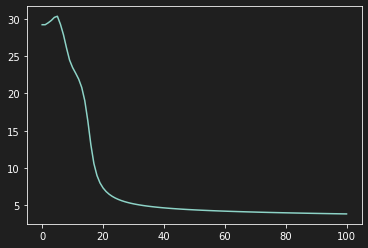

In [387]:
history, b, Loss, Params1, Params2 = artificial_neuron_2(X, y, learning_rate=0.6, n_iter=100)

In [388]:
lim = 15
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)

W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape


(2, 10000)

In [389]:
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))

epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

In [390]:
from matplotlib.animation import FuncAnimation

In [391]:
def animate(params):
  W0 = params[0]
  W1 = params[1]
  b = params[2]
  i = params[3]
  loss = params[4]
  

  # ax[0].clear() # frontiere de décision
  # ax[1].clear() # sigmoide
  # ax[2].clear() # fonction Cout
  
  ax[0].contourf(W11, W22, L, 20, cmap='magma', zorder=-1)
  ax[0].scatter(Params1[int(i)], Params2[int(i)], c='r', marker='x', s=50, zorder=1)
  ax[0].plot(Params1[0:int(i)], Params2[0:int(i)], lw=3, c='r', zorder=1)

  ax[1].plot(Loss[0:int(i)], lw=3, c='white')
  ax[1].set_xlim(0, len(Params1))
  ax[1].set_ylim(min(Loss) - 2, max(Loss) + 2)
  

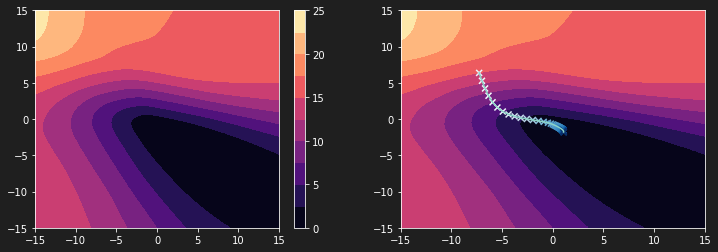

In [392]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.scatter(history[:, 0], history[:, 1], c=history[:, 2], cmap='Blues', marker='x')
plt.plot(history[:, 0], history[:, 1])
# plt.plot(history[:, 0], history[:, 1], c='r')
# plt.colorbar()

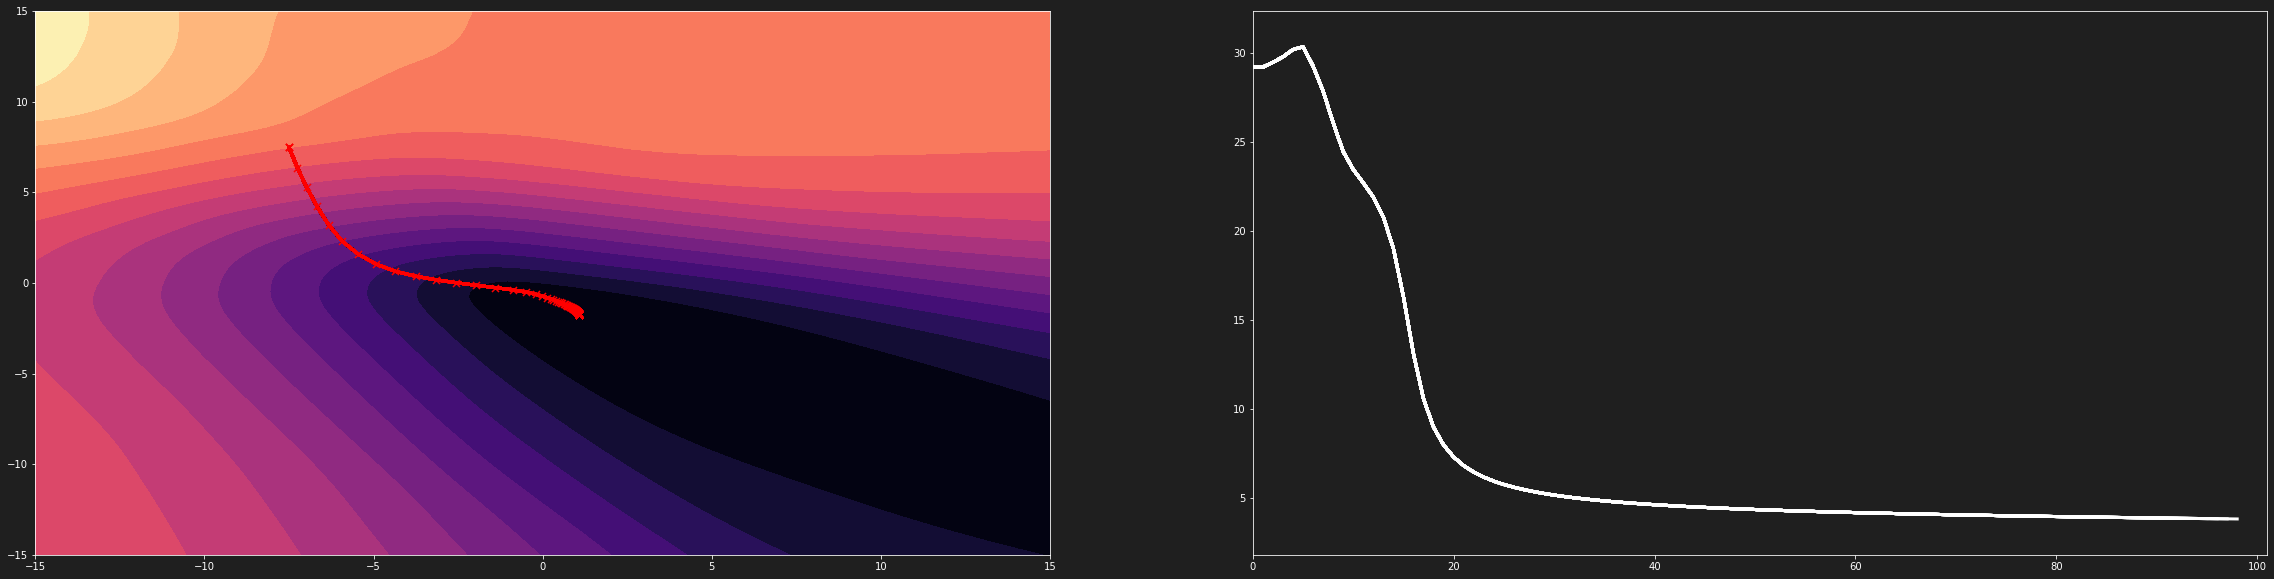

In [393]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
ani = FuncAnimation(fig, animate, frames=history, interval=10, repeat=False)

import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=3200)
ani.save('animation3.mp4', writer=writer)

Une partie des erreurs on était corrigé par Tabine et Copilot 😎 tkt pa 
C'était que la syntax ..... oui oui 

👏👏 On peut s'applaudir après 4h de code intensif +  mathématiques HORRIBLES 
Entre le Dev sur rbx et cette chose pt.. j'en perds mes neuronnes c'est juste une question d'habitude.Pour des cellules chelou tkt ..... enfin juste check les cels de sorties (OUT[x])
Si tu veux open une pull il y a pas de prob à me c... bref 
Enfin dis moi si c'est du bon taff, j'ai ask sur Stack mais personne veux check le code (Perte de temps)

In [246]:
import plotly.graph_objects as go

fig = (go.Figure(data=[go.Surface(z=L, x=W11, y=W22, opacity = 1)]))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()